In [208]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 16,10
plt.style.use('ggplot')
from pandas.tools.plotting import parallel_coordinates
from pandas.tools.plotting import andrews_curves

In [150]:
data = pd.read_csv("baikal_timings.dat0", header=None, sep=' ', 
                   names="size n t0 t1 t2 t3".split(),
                   dtype={0: int, 1: int, 2: float, 3: float, 4: float, 5: float})

In [252]:
data['diff32'] = data['t3'] - data['t2']
data['diff21'] = data['t2'] - data['t1']
data['diff10'] = data['t1'] - data['t0']
data['div32'] = data['t3'] / data['t2']
data['div31'] = data['t3'] / data['t1']
data['div21'] = data['t2'] / data['t1']

In [253]:
data=data[data['size']<2**28]
data.tail()

,size,n,t0,t1,t2,t3,diff32,diff21,diff10,div32,div21,div31
107,67108864,4,1.400000e-08,0.143585,0.411472,0.846317,0.434845,0.267887,0.143585,2.056804,2.865708,5.894202
108,134217728,1,1.400000e-08,0.255555,0.369899,0.584855,0.214956,0.114344,0.255555,1.581121,1.447435,2.288571
109,134217728,2,1.900000e-08,0.237409,0.421734,0.855091,0.433357,0.184326,0.237409,2.027560,1.776406,3.601768
110,134217728,3,1.400000e-08,0.277853,0.661499,1.303866,0.642367,0.383646,0.277853,1.971078,2.380755,4.692653
111,134217728,4,1.400000e-08,0.291350,0.834979,1.700372,0.865393,0.543629,0.291350,2.036426,2.865896,5.836185


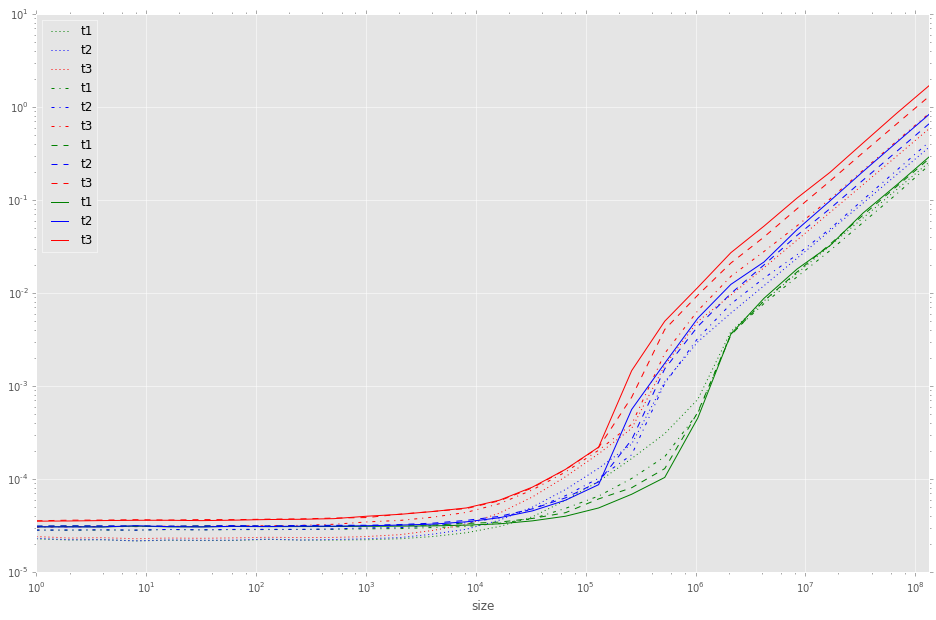

In [254]:
linestyles = [':', '-.', '--','-']
labels = []
fig, ax = plt.subplots()
for key, grp in data.groupby(['n']):
    ls = linestyles[key-1]
    ax = grp.plot(ax=ax, x='size',y="t1 t2 t3".split(), logy=True, logx=True, style=['g'+ls,'b'+ls,'r'+ls])
    labels.append(key)


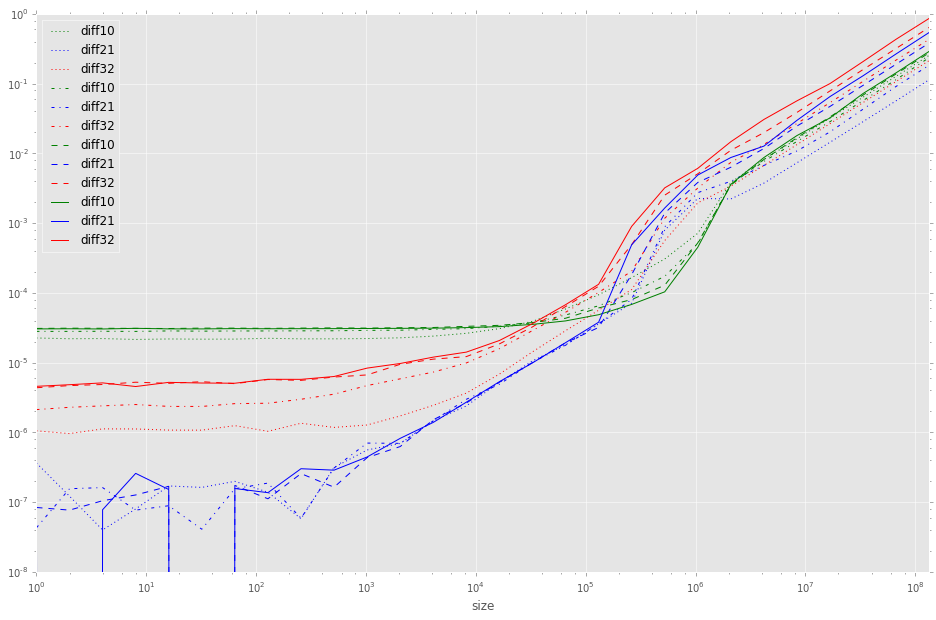

In [255]:
linestyles = [':', '-.', '--','-']
labels = []
fig, ax = plt.subplots()
for key, grp in data.groupby(['n']):
    ls = linestyles[key-1]
    ax = grp.plot(ax=ax, x='size',y="diff10 diff21 diff32".split(), logy=True, logx=True, style=['g'+ls,'b'+ls,'r'+ls])
    labels.append(key)

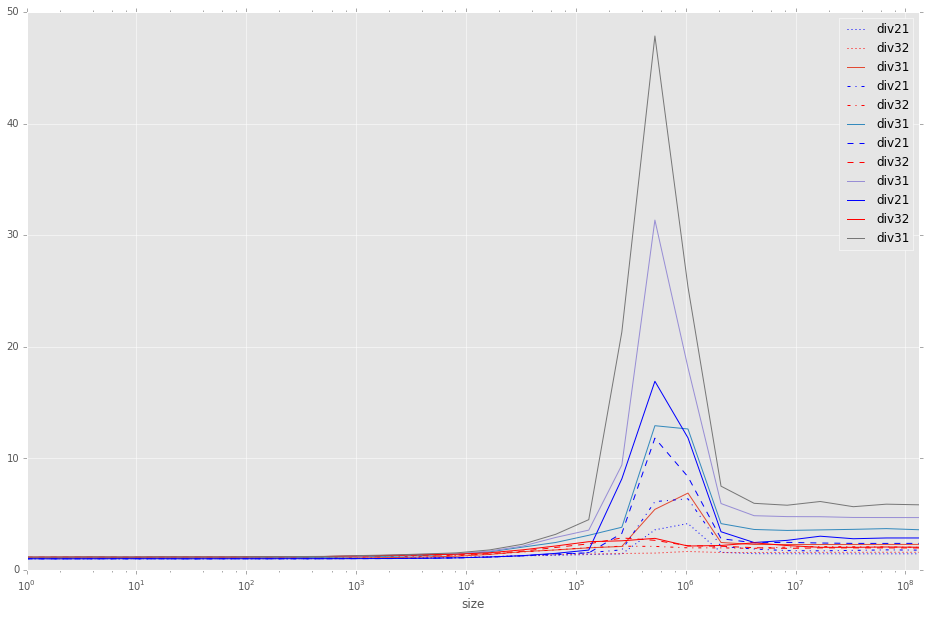

In [256]:
linestyles = [':', '-.', '--','-']
labels = []
fig, ax = plt.subplots()
for key, grp in data.groupby(['n']):
    ls = linestyles[key-1]
    ax = grp.plot(ax=ax, x='size',y="div21 div32 div31".split(), logy=False, logx=True, style=['b'+ls,'r'+ls])
    labels.append(key)

In [257]:
df = data[data['size'] > 2**20].groupby("size n".split()).sum()
df.head()

t0        t1        t2        t3    diff32    diff21  \
size    n                                                                   
2097152 1  1.400000e-08  0.003847  0.006073  0.009470  0.003397  0.002226   
        2  1.900000e-08  0.003628  0.007614  0.015064  0.007451  0.003986   
        3  2.400000e-08  0.003521  0.009866  0.020958  0.011092  0.006344   
        4  1.400000e-08  0.003611  0.012357  0.027101  0.014744  0.008746   
4194304 1  1.400000e-08  0.008190  0.011945  0.018675  0.006730  0.003755   

             diff10     div32     div21     div31  
size    n                                          
2097152 1  0.003847  1.559422  1.578796  2.462009  
        2  0.003628  1.978586  2.098677  4.152413  
        3  0.003521  2.124320  2.801644  5.951587  
        4  0.003610  2.193227  3.422400  7.506099  
4194304 1  0.008189  1.563457  1.458573  2.280416

In [258]:
df.unstack().head()

/usr/lib/python3.5/site-packages/pandas/core/index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


t0                                                  t1  \
n                    1             2             3             4         1   
size                                                                         
2097152   1.400000e-08  1.900000e-08  2.400000e-08  1.400000e-08  0.003847   
4194304   1.400000e-08  2.400000e-08  2.100000e-08  1.400000e-08  0.008190   
8388608   1.400000e-08  2.500000e-08  1.400000e-08  1.400000e-08  0.016236   
16777216  1.400000e-08  2.400000e-08  2.400000e-08  1.600000e-08  0.032242   
33554432  1.400000e-08  1.500000e-08  1.400000e-08  1.400000e-08  0.064146   

                                              t2              ...     \
n                2         3         4         1         2    ...      
size                                                          ...      
2097152   0.003628  0.003521  0.003611  0.006073  0.007614    ...      
4194304   0.007683  0.008203  0.008747  0.011945  0.014416    ...      
8388608   0.014883  0.016806  0.018061  0.023596  0.025752    ...      
16777216  0.028576  0.033460  0.032341  0.046731  0.048969    ...      
33554432  0.057440  0.068774  0.072445  0.092753  0.100637    ...      

             div32               div21                                \
n                3         4         1         2         3         4   
size                                                                   
2097152   2.124320  2.193227  1.578796  2.098677  2.801644  3.422400   
4194304   1.995855  2.429762  1.458573  1.876444  2.435885  2.457128   
8388608   1.933735  2.186414  1.453281  1.730360  2.471931  2.652860   
16777216  1.977063  2.028107  1.449383  1.713646  2.412738  3.024166   
33554432  1.976936  2.026859  1.445959  1.752026  2.378912  2.796279   

             div31                                
n                1         2         3         4  
size                                              
2097152   2.462009  4.152413  5.951587  7.506099  
4194304   2.280416  3.627577  4.861674  5.970237  
8388608   2.278411  3.539682  4.780061  5.800249  
16777216  2.280018  3.588433  4.770135  6.133331  
33554432  2.283346  3.638333  4.702956  5.667665  

[5 rows x 40 columns]

/usr/lib/python3.5/site-packages/pandas/core/index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


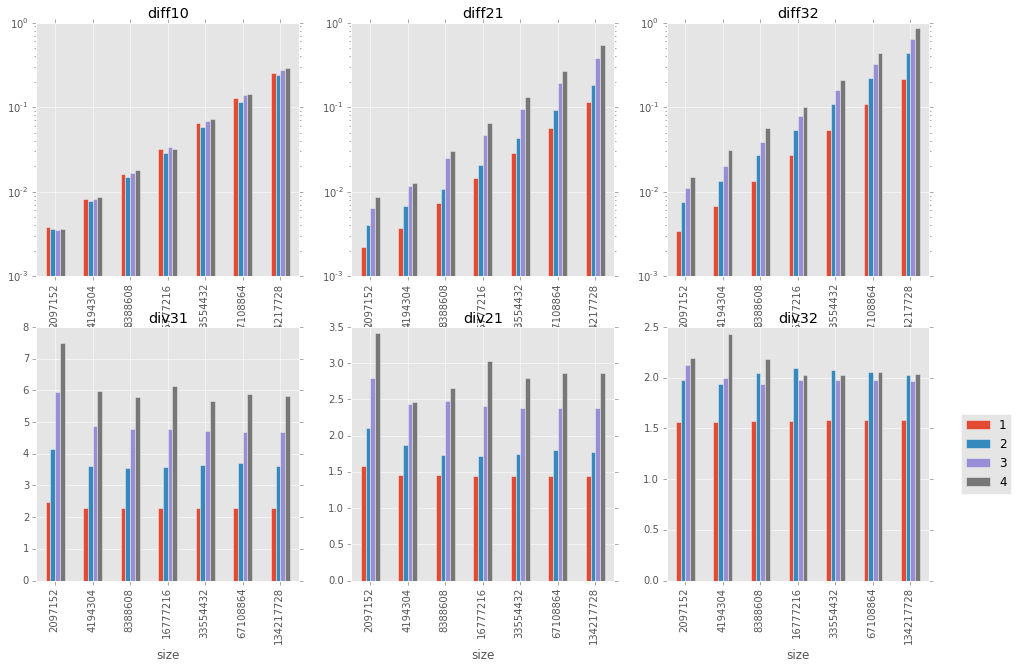

In [264]:
fig, ax = plt.subplots(2, 3)
df_local = df.unstack()
for i, y in enumerate("div31 div21 div32".split()):
    df_local.plot(kind='bar', y=y, ax=ax[1][i], legend=False, title=y)

for i, y in enumerate("diff10 diff21 diff32".split()):
    df_local.plot(kind='bar', y=y, ax=ax[0][i], legend=False, title=y, logy=True)

plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))